###Exploratory Data Analysis

In [1]:
# importing helpful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# import data from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/My Drive/F1_data'

Mounted at /content/drive
/content/drive/My Drive/F1_data


In [3]:
# Naming all F1 datasets

#f1 driver information from 1950-2023 season
driver_dt=pd.read_csv('drivers.csv')

#F1 races
races_dt=pd.read_csv('races.csv')

#Results of F1 races
results_dt=pd.read_csv('results.csv')

#Final standings of drivers
standings_dt=pd.read_csv('driver_standings.csv')

#Different race statuses
status_dt=pd.read_csv('status.csv')

#constructors
constructors_dt=pd.read_csv('constructors.csv')

#constructors standings
constructor_standings_dt=pd.read_csv('constructor_standings.csv')

#circuits aka the different "tracks" on the races
circuits_dt=pd.read_csv('circuits.csv')

#pitstops
pit_stops_dt=pd.read_csv('pit_stops.csv')

#lap times information
lap_times=pd.read_csv('lap_times.csv')

#Qualifying data
quali_dt=pd.read_csv('qualifying.csv')

####Driver data set

In [4]:
#preview data
driver_dt.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
len(driver_dt) #857 total rows in dataset

857

In [5]:
driver_dt['driverRef'].nunique() #857 unique drivers based on driverref (lastname)

857

In [6]:
driver_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [7]:
#creating new columns: drivers full name and age
driver_dt['FullName'] = driver_dt['forename'] + ' ' + driver_dt['surname']

#delete unnecessary columns
driver_dt = driver_dt.drop(columns=['driverRef', 'number', 'code','forename','surname', 'url','nationality'])


In [9]:
driver_dt.head()

,driverId,dob,FullName
0,1,1985-01-07,Lewis Hamilton
1,2,1977-05-10,Nick Heidfeld
2,3,1985-06-27,Nico Rosberg
3,4,1981-07-29,Fernando Alonso
4,5,1981-10-19,Heikki Kovalainen


#### Results data set

In [8]:
#preview data
results_dt.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [11]:
results_dt.info() # basic information of results table;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

Of note, time variables are objects. This will need to be converted if calculating lap times as a feature

In [13]:
# missing values
print(results_dt.isnull().sum()) #None of the columns have missing values

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64


In [14]:
results_dt.shape #there are 26,080 rows and 18 cols

(26080, 18)

#### Races Data set

In [9]:
# basic information
races_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


In [10]:
# missing values
print(races_dt.isnull().sum())

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64


In [11]:
races_dt.shape #there are 1,101 rows and 18 columns in data set

(1101, 18)

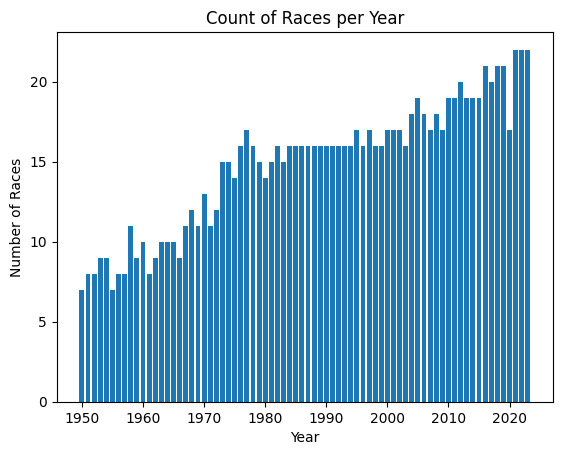

In [12]:
#Count of races (based on raceId) per year

#Create a new column for year
races_dt['year'] = pd.to_datetime(races_dt['date']).dt.year

#calculating count of raceID by new col year
race_count_by_year = races_dt.groupby('year')['raceId'].count()

#Create a bar chart
plt.bar(race_count_by_year.index, race_count_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.title('Count of Races per Year')
plt.show()

Data set contains race information of races that occured between 1950-2023. Over time the number of scheduled races has increased every year. In 1950 there was 7 races whereas in 2023 there was 22.

#### Pit Stops

In [13]:
#preview data
pit_stops_dt.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [27]:
pit_stops_dt.shape #there are 10,089 rows and 7 columns in data set

(10089, 7)

In [14]:
# missing values
print(pit_stops_dt.isnull().sum()) # no missing vaues

raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64


In [15]:
# basic information
pit_stops_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


In [16]:
pit_stops_dt.describe(include='all')

,raceId,driverId,stop,lap,time,duration,milliseconds
count,10089.000000,10089.000000,10089.000000,10089.000000,10089,10089,1.008900e+04
unique,NaN,NaN,NaN,NaN,7492,6969,NaN
top,NaN,NaN,NaN,NaN,14:22:38,22.745,NaN
freq,NaN,NaN,NaN,NaN,6,7,NaN
mean,962.774011,523.998910,1.759738,25.312023,NaN,NaN,7.534863e+04
std,81.144375,389.698555,0.916282,14.729775,NaN,NaN,2.788588e+05
min,841.000000,1.000000,1.000000,1.000000,NaN,NaN,1.289700e+04
25%,888.000000,18.000000,1.000000,13.000000,NaN,NaN,2.191400e+04
50%,958.000000,815.000000,2.000000,25.000000,NaN,NaN,2.357000e+04
75%,1035.000000,831.000000,2.000000,36.000000,NaN,NaN,2.620200e+04


In [17]:
# Joining driver information to pit stops dataset

driver_pit_combined= pd.merge(pit_stops_dt,driver_dt, on = "driverId")
driver_pit_combined.shape

driver_pit_combined.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,dob,FullName
0,841,153,1,1,17:05:23,26.898,26898,1990-03-23,Jaime Alguersuari
1,841,153,2,17,17:31:06,24.463,24463,1990-03-23,Jaime Alguersuari
2,841,153,3,35,17:59:45,26.348,26348,1990-03-23,Jaime Alguersuari
3,842,153,1,16,16:32:25,23.584,23584,1990-03-23,Jaime Alguersuari
4,842,153,2,32,17:00:55,22.888,22888,1990-03-23,Jaime Alguersuari


In [18]:
# count number of pit stops per driver per race
pit_cnt=driver_pit_combined.groupby(['driverId', 'raceId'])['stop'].count().reset_index(name='pitstop_cnt')
pit_cnt.head()

,driverId,raceId,pitstop_cnt
0,1,841,2
1,1,842,4
2,1,843,3
3,1,844,4
4,1,845,4


In [19]:
# average pitstop time
pit_time=driver_pit_combined.groupby(['driverId', 'raceId'])['milliseconds'].mean().reset_index(name='pitstop_avg')
pit_time.head()

,driverId,raceId,pitstop_avg
0,1,841,23213.000000
1,1,842,23252.750000
2,1,843,20659.333333
3,1,844,24909.250000
4,1,845,20364.250000


In [20]:
#Add pit stop counts to the combined data set of driver and pit stops

driver_pit_clean= pd.merge(driver_pit_combined, pit_cnt,on=['raceId', 'driverId'])
driver_pit_clean.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,dob,FullName,pitstop_cnt
0,841,153,1,1,17:05:23,26.898,26898,1990-03-23,Jaime Alguersuari,3
1,841,153,2,17,17:31:06,24.463,24463,1990-03-23,Jaime Alguersuari,3
2,841,153,3,35,17:59:45,26.348,26348,1990-03-23,Jaime Alguersuari,3
3,842,153,1,16,16:32:25,23.584,23584,1990-03-23,Jaime Alguersuari,2
4,842,153,2,32,17:00:55,22.888,22888,1990-03-23,Jaime Alguersuari,2


In [21]:
#Add average pit stop time at the driver and race ID level
driver_pit_clean= pd.merge(driver_pit_clean, pit_time,on=['raceId', 'driverId'])

#lap information to have final dataset be 1 row per driver per race and take unique rows
driver_pit_clean = driver_pit_clean.drop(columns=['stop', 'lap', 'time','duration','milliseconds'])
driver_pit_clean = driver_pit_clean.drop_duplicates()


In [22]:
driver_pit_clean.shape #4,931 rows and 6 columns

(4931, 6)

In [23]:
driver_pit_clean.head()

,raceId,driverId,dob,FullName,pitstop_cnt,pitstop_avg
0,841,153,1990-03-23,Jaime Alguersuari,3,25903.00
3,842,153,1990-03-23,Jaime Alguersuari,2,23236.00
5,843,153,1990-03-23,Jaime Alguersuari,1,22419.00
6,844,153,1990-03-23,Jaime Alguersuari,4,22114.00
10,845,153,1990-03-23,Jaime Alguersuari,4,21443.75


#### Lap Times

In [24]:
#preview data set
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [25]:
#view columns with null values
lap_times.isnull().sum()

raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64

In [26]:
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


In [27]:
#calculating average lap times per driver per race id to add to clean pit stop data set
avg_laptimes= lap_times.groupby(['raceId', 'driverId'])['milliseconds'].mean().reset_index(name='Avg_laptime_race')
avg_laptimes.head()

,raceId,driverId,Avg_laptime_race
0,1,1,97563.758621
1,1,2,97635.672414
2,1,3,97612.172414
3,1,4,97597.637931
4,1,6,91822.235294


In [28]:
driver_pit_clean= pd.merge(driver_pit_clean, avg_laptimes,on=['raceId', 'driverId'])
driver_pit_clean.head()
#this dataset is 1 row per driver per race

,raceId,driverId,dob,FullName,pitstop_cnt,pitstop_avg,Avg_laptime_race
0,841,153,1990-03-23,Jaime Alguersuari,3,25903.00,95244.263158
1,842,153,1990-03-23,Jaime Alguersuari,2,23236.00,107329.236364
2,843,153,1990-03-23,Jaime Alguersuari,1,22419.00,107747.111111
3,844,153,1990-03-23,Jaime Alguersuari,4,22114.00,95291.403509
4,845,153,1990-03-23,Jaime Alguersuari,4,21443.75,93028.265625


In [30]:
# count of races per driver
driver_race_count = driver_pit_clean.groupby('driverId')['raceId'].count().reset_index(name='race_count')
driver_race_count.head()

,driverId,race_count
0,1,244
1,2,10
2,3,111
3,4,196
4,5,40


In [31]:
# average lap time per driver (all historical data, not at the race lvl)
avg_lap_all=driver_pit_clean.groupby(['driverId'])['Avg_laptime_race'].mean().reset_index(name='Driver_avg_laptime')
avg_lap_all.head()

,driverId,Driver_avg_laptime
0,1,98846.714844
1,2,114919.000865
2,3,102939.946063
3,4,102207.821532
4,5,110487.714189


In [32]:
#avg pit stop count
#average pitstop time
avg_pit_all=driver_pit_clean.groupby(['driverId'])['pitstop_cnt'].mean().reset_index(name='Driver_avg_pit_cnt')
avg_pit_time=driver_pit_clean.groupby(['driverId'])['pitstop_avg'].mean().reset_index(name='Driver_avg_pit_time')

In [33]:
driver_all= pd.merge(driver_pit_clean,avg_lap_all,on=['driverId'],how='left') # adding drivers total avg lap time
driver_all=pd.merge(driver_all,avg_pit_all,on=['driverId'],how='left') # adding drivers total pit stop count
driver_all=pd.merge(driver_all,driver_race_count,on=['driverId'],how='left') # adding drivers total race count
driver_all=pd.merge(driver_all,avg_pit_time,on=['driverId'],how='left') # adding drivers avg pit stop time

In [34]:
driver_all.head()

,raceId,driverId,dob,FullName,pitstop_cnt,pitstop_avg,Avg_laptime_race,Driver_avg_laptime,Driver_avg_pit_cnt,race_count,Driver_avg_pit_time
0,841,153,1990-03-23,Jaime Alguersuari,3,25903.00,95244.263158,105934.5496,2.388889,18,23865.597222
1,842,153,1990-03-23,Jaime Alguersuari,2,23236.00,107329.236364,105934.5496,2.388889,18,23865.597222
2,843,153,1990-03-23,Jaime Alguersuari,1,22419.00,107747.111111,105934.5496,2.388889,18,23865.597222
3,844,153,1990-03-23,Jaime Alguersuari,4,22114.00,95291.403509,105934.5496,2.388889,18,23865.597222
4,845,153,1990-03-23,Jaime Alguersuari,4,21443.75,93028.265625,105934.5496,2.388889,18,23865.597222


In [35]:
driver_all.nunique()
# Driver_all data set contains race information for 72 unique drivers for 251 unique races
# There are 72 unique drivers but 6 distinct values for pit stop counts


raceId                  251
driverId                 72
dob                      72
FullName                 72
pitstop_cnt               6
pitstop_avg            4478
Avg_laptime_race       4930
Driver_avg_laptime       72
Driver_avg_pit_cnt       66
race_count               51
Driver_avg_pit_time      72
dtype: int64

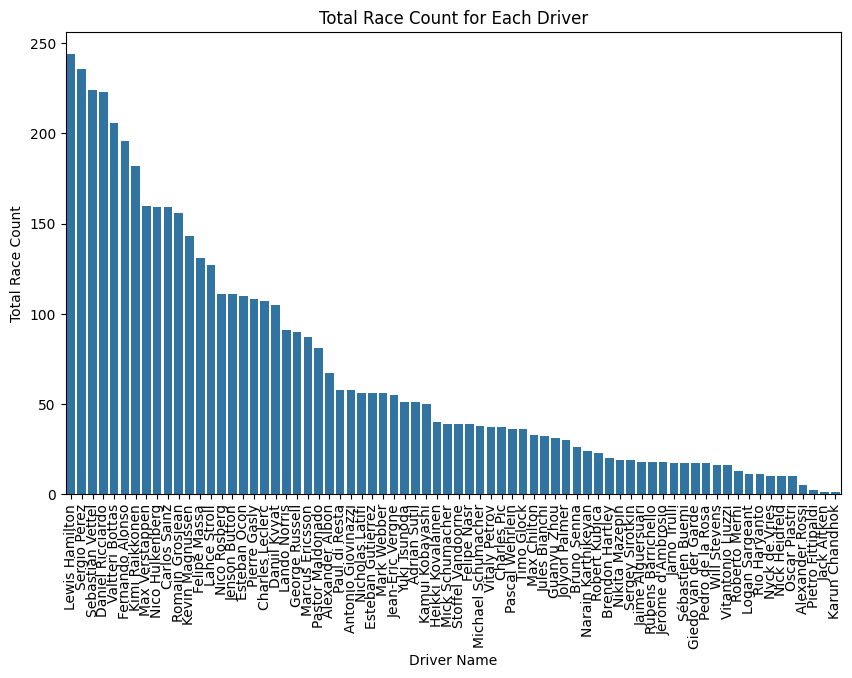

In [36]:
#Bar graph of total race_count grouped by driver

import matplotlib.pyplot as plt
import seaborn as sns

# Bar graph of total race_count grouped by fullname in drivers all dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='FullName', y='race_count', data=driver_all.sort_values(by='race_count', ascending=False))
plt.xticks(rotation=90)
plt.xlabel('Driver Name')
plt.ylabel('Total Race Count')
plt.title('Total Race Count for Each Driver')
plt.show()


### Machine Learning Algorithms

####1. Prepare data set for prediction analysis
Goal is to predict drivers final rank based on historic information

In [37]:
# Results data set
results_dt.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [38]:
# There are 139 different race status
status_dt.nunique()

statusId    139
status      139
dtype: int64

In [39]:
# Merge driver_all dataframe and results to add results information to the clean dataset
driver_results=driver_all.merge(results_dt, on=['raceId', 'driverId'], how='left')
#Add status information
driver_results=driver_results.merge(status_dt, on=['statusId'], how='left')
driver_results.head()

,raceId,driverId,dob,FullName,pitstop_cnt,pitstop_avg,Avg_laptime_race,Driver_avg_laptime,Driver_avg_pit_cnt,race_count,...,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,841,153,1990-03-23,Jaime Alguersuari,3,25903.00,95244.263158,105934.5496,2.388889,18,...,0.0,57,\N,\N,41,10,1:30.467,211.025,11,+1 Lap
1,842,153,1990-03-23,Jaime Alguersuari,2,23236.00,107329.236364,105934.5496,2.388889,18,...,0.0,55,\N,\N,37,17,1:43.744,192.346,11,+1 Lap
2,843,153,1990-03-23,Jaime Alguersuari,1,22419.00,107747.111111,105934.5496,2.388889,18,...,0.0,9,\N,\N,5,23,1:45.700,185.653,36,Wheel
3,844,153,1990-03-23,Jaime Alguersuari,4,22114.00,95291.403509,105934.5496,2.388889,18,...,0.0,57,\N,\N,57,2,1:29.894,213.771,11,+1 Lap
4,845,153,1990-03-23,Jaime Alguersuari,4,21443.75,93028.265625,105934.5496,2.388889,18,...,0.0,64,\N,\N,52,12,1:29.132,188.013,12,+2 Laps


In [40]:
#Total points per driver
driver_points=driver_results.groupby(['driverId'])['points'].sum().reset_index(name='Driver_TotPoints')
driver_points.sort_values(by='Driver_TotPoints', ascending=False)

,driverId,Driver_TotPoints
0,1,4037.0
13,20,2712.0
43,830,2263.0
36,822,1783.0
2,3,1377.0
...,...,...
17,37,0.0
15,24,0.0
9,15,0.0
7,10,0.0


In [41]:
# Convert the 'position' column to numeric type
driver_results['position'] = pd.to_numeric(driver_results['position'], errors='coerce')

#Calculate drivers average position (position=final placement at the specific race)
driver_pos=driver_results.groupby(['driverId'])['position'].mean().reset_index(name='Driver_avg_pos')

driver_pos.sort_values(by='Driver_avg_pos', ascending=True)

,driverId,Driver_avg_pos
0,1,3.103448
43,830,3.806897
11,17,4.673077
2,3,4.943396
13,20,5.177570
...,...,...
50,837,18.222222
17,37,18.750000
15,24,19.750000
18,39,19.894737


In [42]:
# convert data type of rank from object to integer
driver_results['rank'] = driver_results['rank'].astype(int)
#Average rank per driver (rank=overall standings at end of season)
driver_rnk=driver_results.groupby(['driverId'])['rank'].mean().reset_index(name='Driver_avg_rank')
driver_rnk.sort_values(by='Driver_avg_rank', ascending=True)

,driverId,Driver_avg_rank
0,1,4.295082
43,830,4.712500
11,17,5.267857
2,3,5.801802
13,20,5.808036
...,...,...
7,10,19.805556
17,37,21.000000
18,39,21.625000
15,24,21.875000


In [43]:
#Adding new fields to full dataset
driver_results=driver_results.merge(driver_points, on=['driverId'], how='left')
driver_results=driver_results.merge(driver_pos,on=['driverId'], how='left')
driver_results=driver_results.merge(driver_rnk,on=['driverId'], how='left')

In [44]:
#preview updated dataset
driver_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4931 entries, 0 to 4930
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   raceId               4931 non-null   int64  
 1   driverId             4931 non-null   int64  
 2   dob                  4931 non-null   object 
 3   FullName             4931 non-null   object 
 4   pitstop_cnt          4931 non-null   int64  
 5   pitstop_avg          4931 non-null   float64
 6   Avg_laptime_race     4931 non-null   float64
 7   Driver_avg_laptime   4931 non-null   float64
 8   Driver_avg_pit_cnt   4931 non-null   float64
 9   race_count           4931 non-null   int64  
 10  Driver_avg_pit_time  4931 non-null   float64
 11  resultId             4931 non-null   int64  
 12  constructorId        4931 non-null   int64  
 13  number               4931 non-null   object 
 14  grid                 4931 non-null   int64  
 15  position             4428 non-null   f

In [53]:
#constructors

#Calculating average points per constructor
constructor_avg_points=constructor_standings_dt.groupby('constructorId')['points'].mean().reset_index(name='constructor_avg_points')
# merging with constructor_dt to retrieve the team names
constructors_clean=constructor_avg_points.merge(constructors_dt, on=['constructorId'], how='left')
constructors_final=constructors_clean[['constructorId', 'constructor_avg_points', 'name']]
constructors_final.head()

,constructorId,constructor_avg_points,name
0,1,64.310056,McLaren
1,2,41.885714,BMW Sauber
2,3,39.061361,Williams
3,4,42.285714,Renault
4,5,19.376866,Toro Rosso


In [55]:
#Adding constructor information to driver dataframe
full_results=driver_results.merge(constructors_final,on=['constructorId'], how='left')
full_results.head()

,raceId,driverId,dob,FullName,pitstop_cnt,pitstop_avg,Avg_laptime_race,Driver_avg_laptime,Driver_avg_pit_cnt,race_count,...,rank,fastestLapTime,fastestLapSpeed,statusId,status,Driver_TotPoints,Driver_avg_pos,Driver_avg_rank,constructor_avg_points,name
0,841,153,1990-03-23,Jaime Alguersuari,3,25903.00,95244.263158,105934.5496,2.388889,18,...,10,1:30.467,211.025,11,+1 Lap,26.0,11.8125,11.444444,19.376866,Toro Rosso
1,842,153,1990-03-23,Jaime Alguersuari,2,23236.00,107329.236364,105934.5496,2.388889,18,...,17,1:43.744,192.346,11,+1 Lap,26.0,11.8125,11.444444,19.376866,Toro Rosso
2,843,153,1990-03-23,Jaime Alguersuari,1,22419.00,107747.111111,105934.5496,2.388889,18,...,23,1:45.700,185.653,36,Wheel,26.0,11.8125,11.444444,19.376866,Toro Rosso
3,844,153,1990-03-23,Jaime Alguersuari,4,22114.00,95291.403509,105934.5496,2.388889,18,...,2,1:29.894,213.771,11,+1 Lap,26.0,11.8125,11.444444,19.376866,Toro Rosso
4,845,153,1990-03-23,Jaime Alguersuari,4,21443.75,93028.265625,105934.5496,2.388889,18,...,12,1:29.132,188.013,12,+2 Laps,26.0,11.8125,11.444444,19.376866,Toro Rosso


In [60]:
#Filtering dataset to drivers who finished
drivers_finished = full_results[driver_results['status'] == 'Finished']
drivers_finished.shape #2645 rows and 33 columns

(2645, 33)

In [61]:
drivers_finished.head()

,raceId,driverId,dob,FullName,pitstop_cnt,pitstop_avg,Avg_laptime_race,Driver_avg_laptime,Driver_avg_pit_cnt,race_count,...,rank,fastestLapTime,fastestLapSpeed,statusId,status,Driver_TotPoints,Driver_avg_pos,Driver_avg_rank,constructor_avg_points,name
6,847,153,1990-03-23,Jaime Alguersuari,3,24748.666667,210221.442857,105934.549600,2.388889,18,...,13,1:20.371,195.339,1,Finished,26.0,11.812500,11.444444,19.376866,Toro Rosso
8,849,153,1990-03-23,Jaime Alguersuari,2,24407.000000,103852.000000,105934.549600,2.388889,18,...,15,1:37.160,218.275,1,Finished,26.0,11.812500,11.444444,19.376866,Toro Rosso
13,855,153,1990-03-23,Jaime Alguersuari,2,22188.000000,104151.886792,105934.549600,2.388889,18,...,8,1:37.411,214.608,1,Finished,26.0,11.812500,11.444444,19.376866,Toro Rosso
14,856,153,1990-03-23,Jaime Alguersuari,2,22313.000000,107846.036364,105934.549600,2.388889,18,...,8,1:40.940,200.257,1,Finished,26.0,11.812500,11.444444,19.376866,Toro Rosso
19,842,30,1969-01-03,Michael Schumacher,3,22354.666667,106155.857143,105156.505153,2.368421,38,...,11,1:42.491,194.698,1,Finished,125.0,9.111111,11.447368,270.773063,Mercedes


In [62]:
print(drivers_finished.columns)

Index(['raceId', 'driverId', 'dob', 'FullName', 'pitstop_cnt', 'pitstop_avg',
       'Avg_laptime_race', 'Driver_avg_laptime', 'Driver_avg_pit_cnt',
       'race_count', 'Driver_avg_pit_time', 'resultId', 'constructorId',
       'number', 'grid', 'position', 'positionText', 'positionOrder', 'points',
       'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'status', 'Driver_TotPoints',
       'Driver_avg_pos', 'Driver_avg_rank', 'constructor_avg_points', 'name'],
      dtype='object')


In [67]:
#Creating a dataframe that is 1 row per driver with historic information for drivers that have finished
#List of columns to include in final dataset
col = ['FullName', 'Driver_avg_laptime', 'Driver_avg_pit_cnt',
       'race_count', 'Driver_avg_pit_time','Driver_TotPoints',
       'Driver_avg_pos', 'Driver_avg_rank','name','constructor_avg_points']

# Create the DataFrame using only the specified columns
df_final = pd.DataFrame(drivers_finished, columns=col)
# Drop duplicate rows
df_final= df_final.drop_duplicates()
#rename constructor name column to be more clear
df_final=df_final.rename(columns={'name': 'constructor_name'})

print(df_final) #125 rows and 10 columns

                FullName  Driver_avg_laptime  Driver_avg_pit_cnt  race_count  \
6      Jaime Alguersuari       105934.549600            2.388889          18   
19    Michael Schumacher       105156.505153            2.368421          38   
56           Mark Webber       103055.958258            2.535714          56   
112      Fernando Alonso       102207.821532            2.071429         196   
193      Fernando Alonso       102207.821532            2.071429         196   
...                  ...                 ...                 ...         ...   
4869         Guanyu Zhou        98053.675599            2.064516          31   
4900       Nyck de Vries        93269.678108            1.900000          10   
4902       Nyck de Vries        93269.678108            1.900000          10   
4911      Logan Sargeant        97562.248993            2.363636          11   
4921       Oscar Piastri        96754.774166            1.900000          10   

      Driver_avg_pit_time  Driver_TotPo

#### 2. Explore final dataset

In [68]:
df_final.describe()

,Driver_avg_laptime,Driver_avg_pit_cnt,race_count,Driver_avg_pit_time,Driver_TotPoints,Driver_avg_pos,Driver_avg_rank,constructor_avg_points
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,101464.857738,2.080470,102.296000,58400.393874,558.608000,11.048881,11.799660,56.006718
std,6206.593698,0.266281,73.691382,30440.056710,793.664651,3.775384,3.646448,63.419255
min,63319.402299,1.631579,1.000000,22726.298246,0.000000,3.103448,4.295082,0.000000
25%,99252.078943,1.881119,37.000000,28846.656667,10.000000,8.081081,9.465409,19.376866
50%,100333.680034,2.020492,91.000000,55727.193016,212.000000,10.683544,11.614173,39.506849
75%,103623.469145,2.243243,159.000000,75478.067130,840.000000,13.545455,13.378378,64.310056
max,131658.198701,3.000000,244.000000,204967.644737,4037.000000,18.750000,21.000000,270.773063


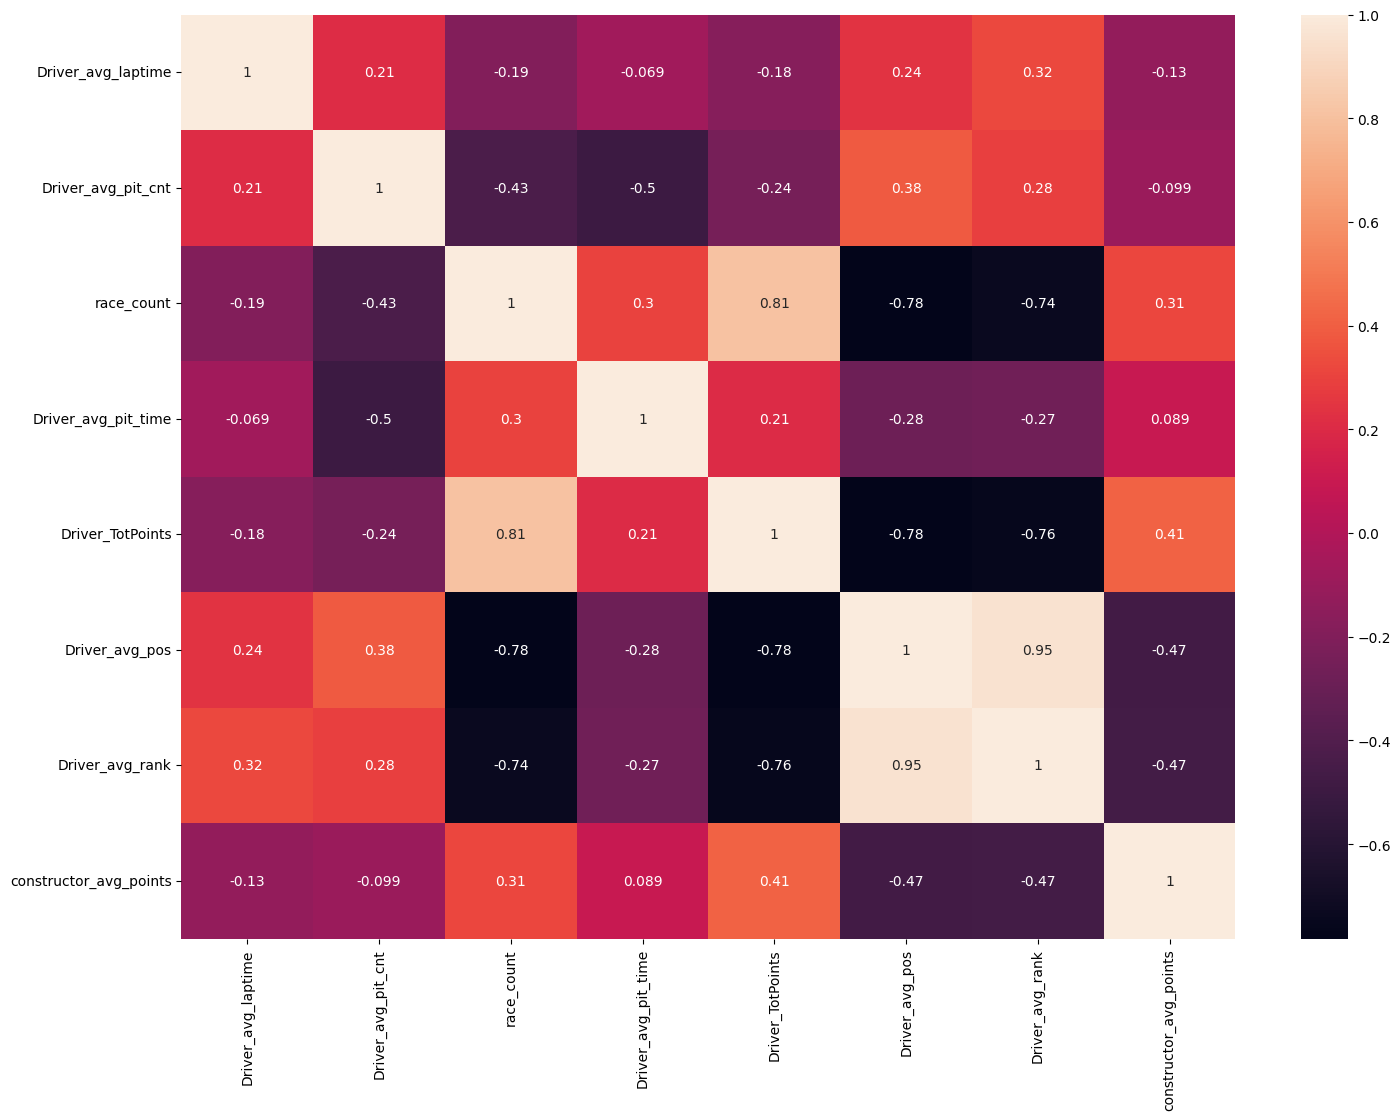

In [69]:
#correlation of fields
plt.figure(figsize=(17,12))
df_final_corr = df_final.drop(columns=["FullName","constructor_name"])
sns.heatmap(df_final_corr.corr(), annot=True)
plt.show()

There are strong correlations (at least 0.7) between:


*   Driver average position and race count
*   Driver total points and race count
*   Driver average position and total points
*   Driver average rank and driver average position
*   Driver total points and driver average position







#### 3. Building Prediction Models

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

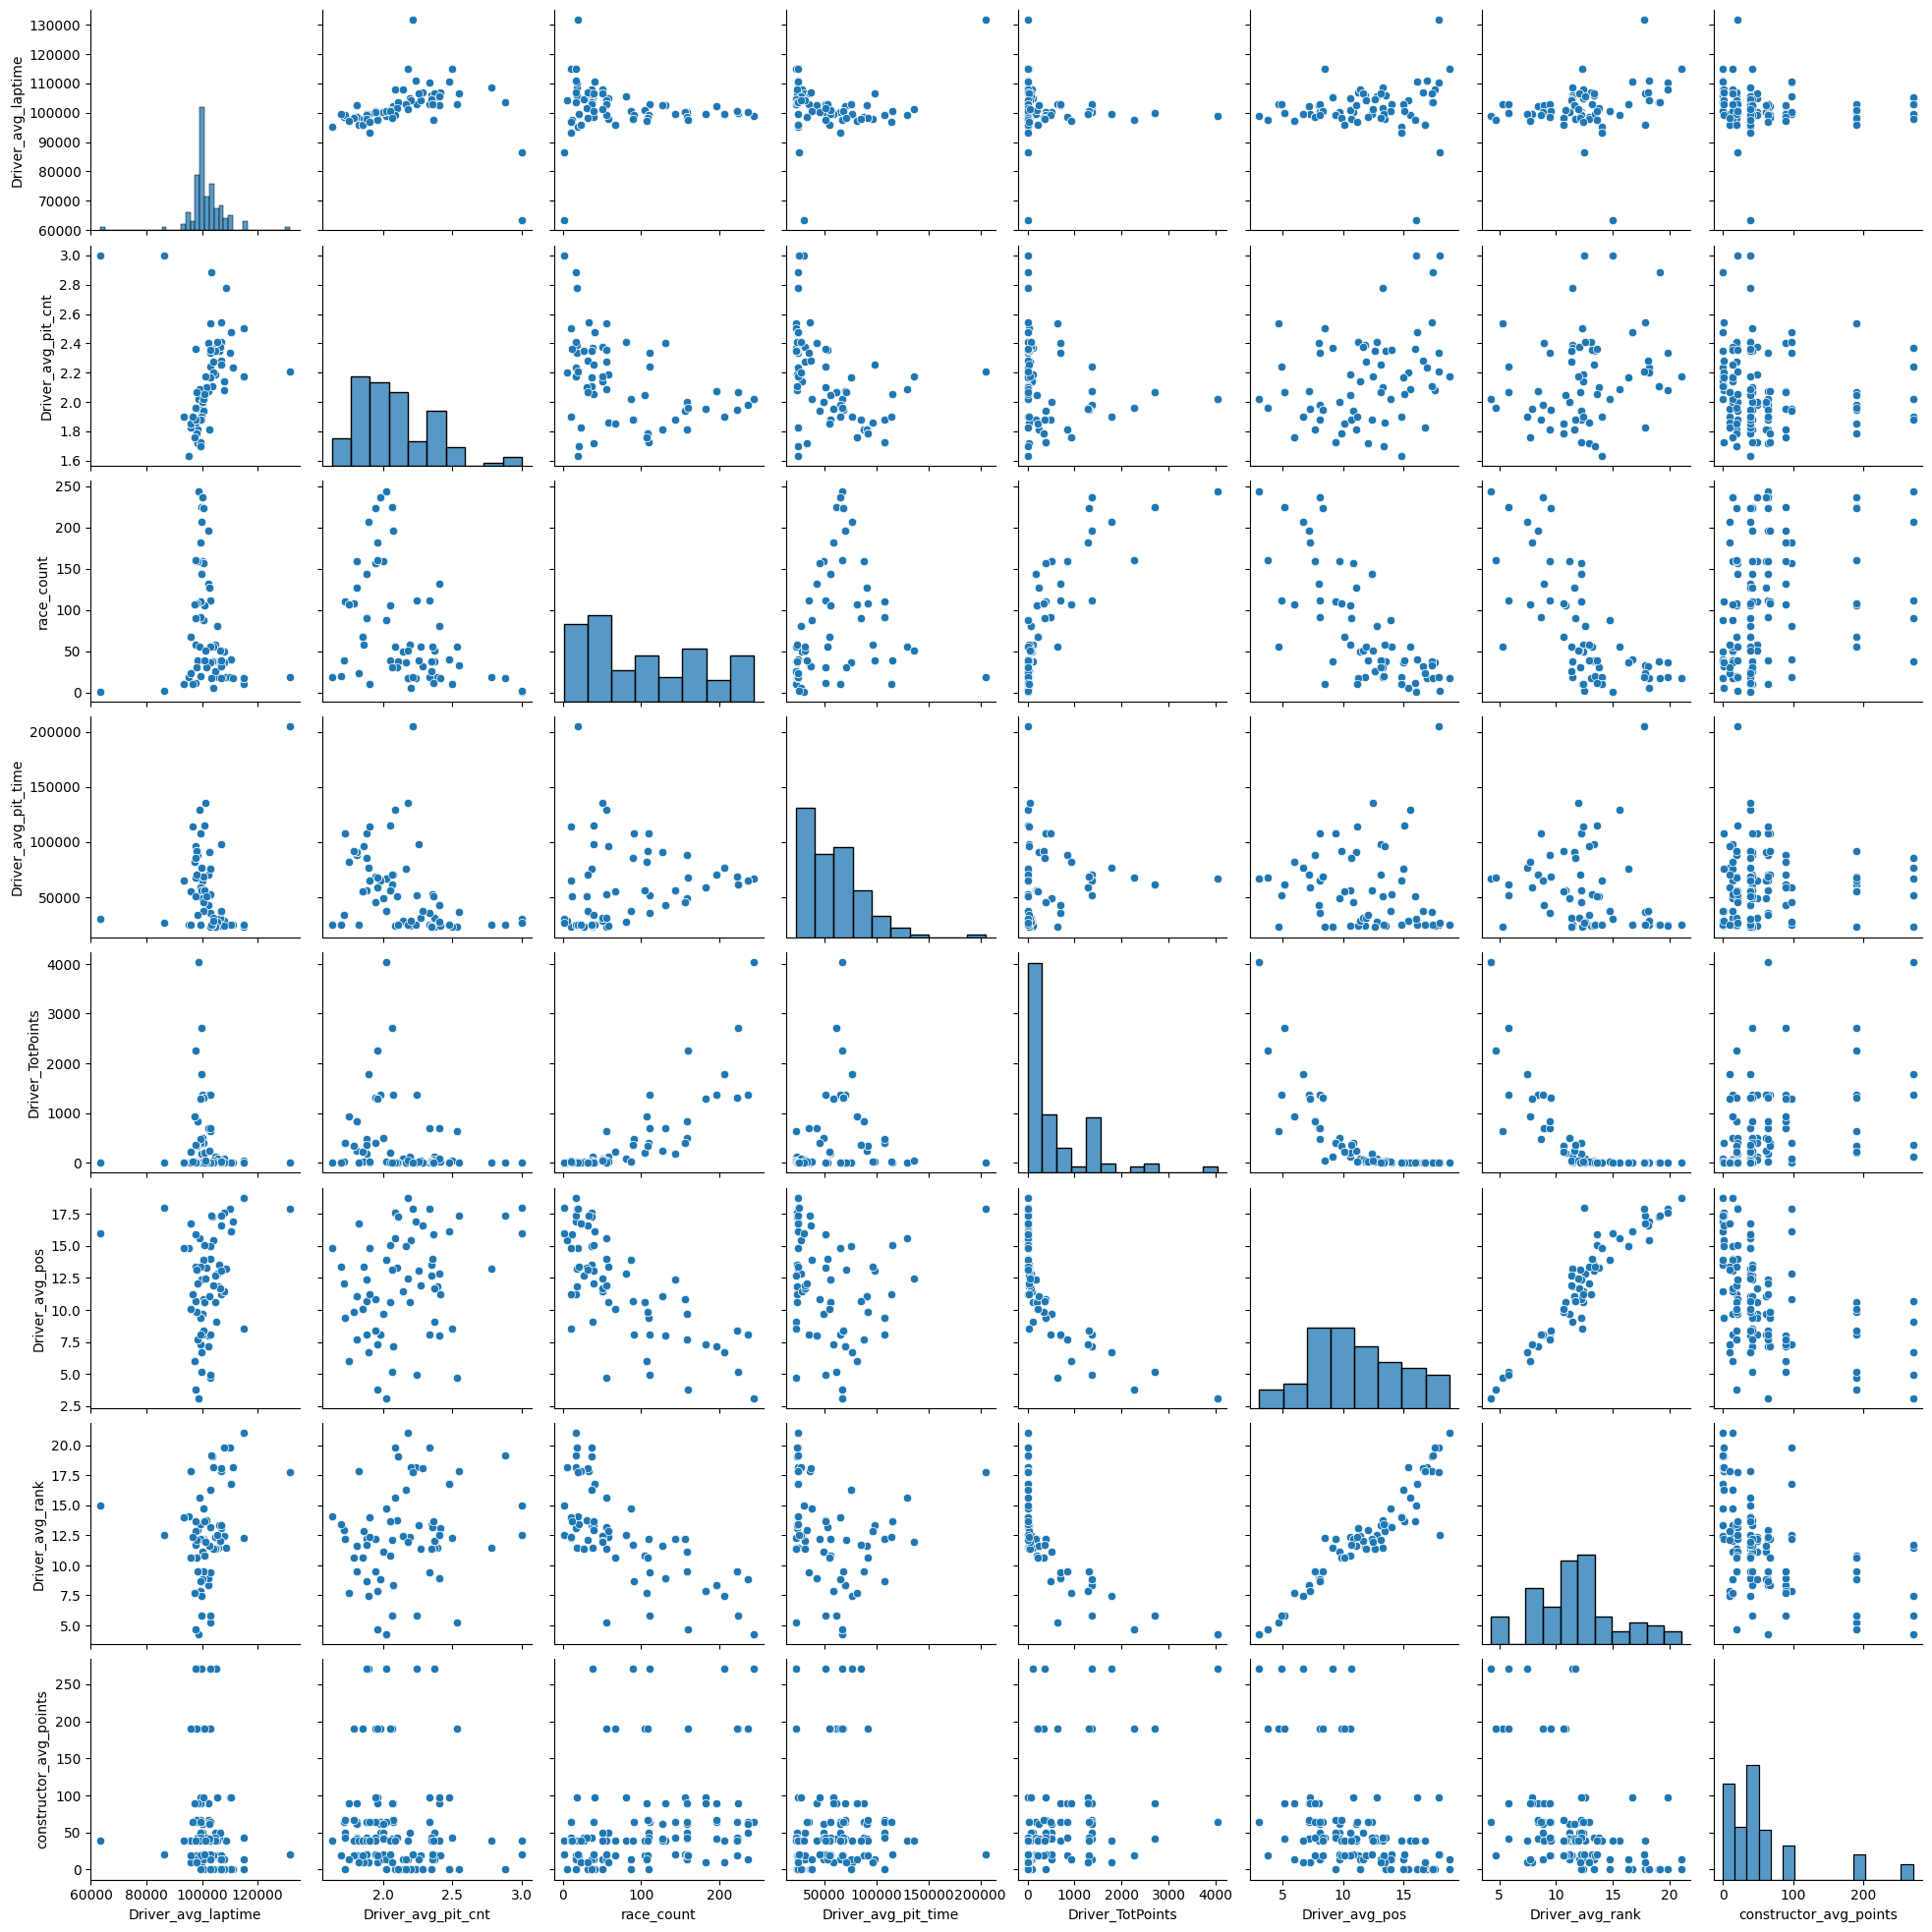

In [70]:
sns.pairplot(df_final)
plt.show()

In [76]:
# Define the target and feature variables
y = df_final['Driver_avg_rank']
X = df_final[['Driver_avg_laptime', 'Driver_avg_pit_cnt',
       'race_count', 'Driver_avg_pit_time','Driver_TotPoints',
       'Driver_avg_pos','constructor_avg_points']]

# Assuming X contains the features and y contains the target variable (driver's rank)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If 'Driver_avg_rank' is continuous, consider using a regression model instead
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (you'll need different metrics for regression)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.840296994215643
R-squared: 0.8748272997311267


R-squared value is closer to 1 indicating that it is a closer fit. While R-squared is a great result, the mean squared error is greater than 1 meaning difference in between the predicted and actual is high. This model needs more investigating and reviewing of the current features.